## Assignment:
Modified version of Lenet & pediction on custom images using TF = 2.5


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import os
import matplotlib.pyplot as plt


In [ ]:
tf.__version__

'2.5.0'

In [ ]:
ROOT = "/content/drive/MyDrive/DL-CV-NLP/CNN/Lenet"
os.chdir(ROOT)
os.getcwd()

'/content/drive/MyDrive/DL-CV-NLP/CNN/Lenet'

In [ ]:
image_path = "/content/drive/MyDrive/DL-CV-NLP/CNN/Lenet/images"

In [ ]:
# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]


In [ ]:
print("Train shape: ", x_train.shape)
print("Test shape: ", x_test.shape)
print("Valid shape: ", x_valid.shape)

Train shape:  (55000, 28, 28)
Test shape:  (10000, 28, 28)
Valid shape:  (5000, 28, 28)


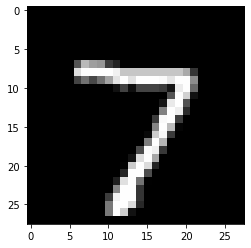

In [ ]:
plt.imshow(x_test[0], cmap='gray')

In [ ]:
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)

In [ ]:
print("Train shape: ", x_train.shape)
print("Test shape: ", x_test.shape)
print("Valid shape: ", x_valid.shape)

Train shape:  (55000, 28, 28, 1)
Test shape:  (10000, 28, 28, 1)
Valid shape:  (5000, 28, 28, 1)


In [ ]:
# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
# Building the Model Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) # 26,16,32
model.add(MaxPooling2D(pool_size=(2, 2))) # 13,13,32
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # 11,11,64
model.add(MaxPooling2D(pool_size=(2, 2))) # 5,5,64

model.add(Flatten())
model.add(Dense(110, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 110)               176110    
_________________________________________________________________
dense_1 (Dense)              (None, 80)                8

In [ ]:
# Compiling
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# Training
 hist = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20
430/430 [==============================] - 40s 92ms/step - loss: 0.2482 - accuracy: 0.9198 - val_loss: 0.0789 - val_accuracy: 0.9770
Epoch 2/20
430/430 [==============================] - 39s 90ms/step - loss: 0.0593 - accuracy: 0.9818 - val_loss: 0.0460 - val_accuracy: 0.9874
Epoch 3/20
430/430 [==============================] - 39s 91ms/step - loss: 0.0380 - accuracy: 0.9883 - val_loss: 0.0479 - val_accuracy: 0.9852
Epoch 4/20
430/430 [==============================] - 39s 91ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0542 - val_accuracy: 0.9836
Epoch 5/20
430/430 [==============================] - 39s 91ms/step - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.0423 - val_accuracy: 0.9878
Epoch 6/20
430/430 [==============================] - 39s 91ms/step - loss: 0.0168 - accuracy: 0.9948 - val_loss: 0.0387 - val_accuracy: 0.9906
Epoch 7/20
430/430 [==============================] - 39s 91ms/step - loss: 0.0122 - accuracy: 0.9964 - val_loss: 0.0418 - val_accuracy:

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.0553 - accuracy: 0.9917
Test Loss: 0.055288609117269516
Test accuracy: 0.9916999936103821


In [ ]:
a = x_test[0]
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# Prediction
import numpy as np
test_image = np.expand_dims(a, axis = 0)
print(test_image.shape)

(1, 28, 28, 1)


In [ ]:
pred = model.predict(test_image)
pred

array([[7.4537108e-24, 2.5380168e-19, 6.2792738e-21, 1.3571486e-22,
        1.1540500e-20, 2.0281924e-24, 1.1917825e-36, 1.0000000e+00,
        1.6000018e-23, 1.3091731e-19]], dtype=float32)

In [ ]:
np.argmax(pred, axis = -1)

array([7])

## Prediction on custom images

In [ ]:
from tensorflow.keras.preprocessing import image
import cv2

In [ ]:
def image_preprocessing(image_path):
  custom_images = os.listdir(image_path)
  test_image_list = []
  dim = (28, 28)
  count = 0
  for image in custom_images:
    img = cv2.imread(image_path + '/' + image,0)
    print(f"Image name ({image}) Original Dimensions : ",img.shape)
    #resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    print('Resized Dimensions : ',resized.shape)
    test_image_list.append(resized)
    count += 1
  
  print(f"Found {count} images!" )
  return np.array(test_image_list)
  

In [ ]:
test_images = image_preprocessing(image_path)

Image name (0.png) Original Dimensions :  (1245, 1280)
Resized Dimensions :  (28, 28)
Image name (9.png) Original Dimensions :  (1280, 1262)
Resized Dimensions :  (28, 28)
Image name (8.png) Original Dimensions :  (1184, 1280)
Resized Dimensions :  (28, 28)
Image name (7.png) Original Dimensions :  (1280, 1156)
Resized Dimensions :  (28, 28)
Image name (6.png) Original Dimensions :  (1171, 1080)
Resized Dimensions :  (28, 28)
Image name (5.png) Original Dimensions :  (1246, 1280)
Resized Dimensions :  (28, 28)
Image name (4.png) Original Dimensions :  (1217, 1280)
Resized Dimensions :  (28, 28)
Image name (3.png) Original Dimensions :  (1280, 1233)
Resized Dimensions :  (28, 28)
Image name (1.png) Original Dimensions :  (1269, 1280)
Resized Dimensions :  (28, 28)
Image name (2.png) Original Dimensions :  (1280, 1274)
Resized Dimensions :  (28, 28)
Image name (10.jpg) Original Dimensions :  (223, 222)
Resized Dimensions :  (28, 28)
Image name (12.png) Original Dimensions :  (224, 225)
R

In [ ]:
data = test_images

In [ ]:
test_images.shape

(15, 28, 28)

In [ ]:
# Peforming reshaping operation
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:
test_images.shape

(15, 28, 28, 1)

In [ ]:
final_pred = model.predict(test_images)

In [ ]:
# final_pred

In [ ]:
y_pred = np.argmax(final_pred, axis = -1)
actual = [0,9,8,7,6,5,4,3,1,2,4,6,3,7,7]

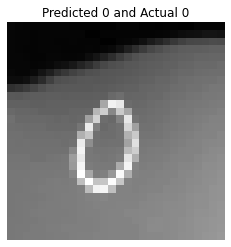

######################


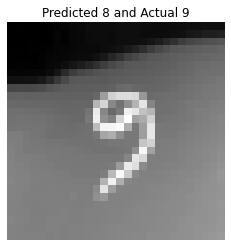

######################


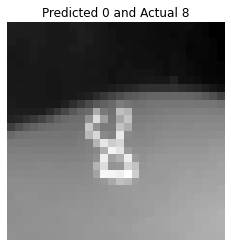

######################


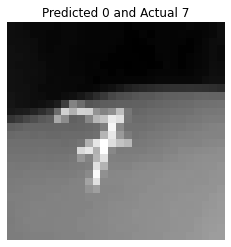

######################


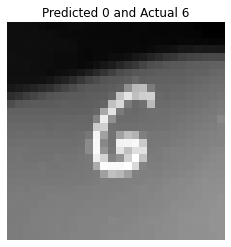

######################


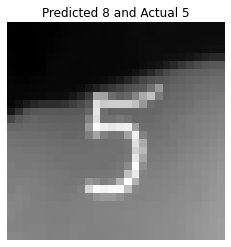

######################


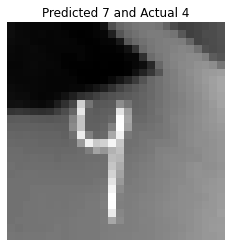

######################


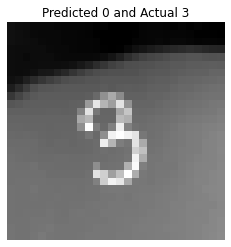

######################


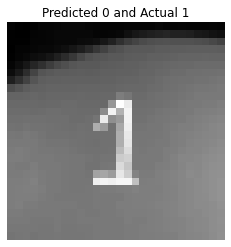

######################


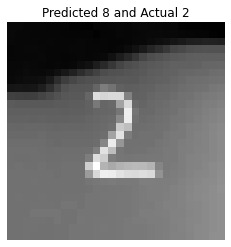

######################


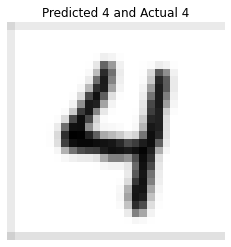

######################


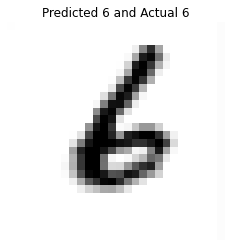

######################


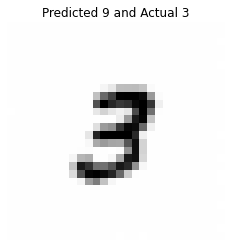

######################


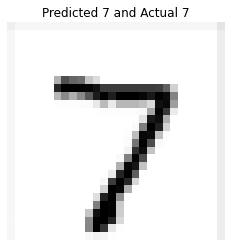

######################


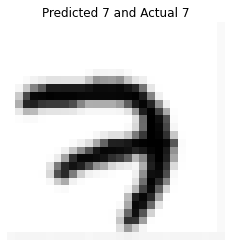

######################


In [ ]:
# plot
for data, pred, actual_data in zip(data, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show() 
  print("######################")